# Support Vector Machines



https://towardsdatascience.com/svm-implementation-from-scratch-python-2db2fc52e5c2


#### Gaussian Kernel

To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. You can think of the Gaussian kernel as a similarity function that measures the “distance” between a pair of examples,
($x^{(i)}$, $x^{(j)}$). The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to 0) as the examples are further apart.
You should now complete the code in `gaussianKernel` to compute the Gaussian kernel between two examples, ($x^{(i)}$, $x^{(j)}$). The Gaussian kernel function is defined as:

$$ K_{\text{gaussian}} \left( x^{(i)}, x^{(j)} \right) = \exp \left( - \frac{\left\lvert\left\lvert x^{(i)} - x^{(j)}\right\lvert\right\lvert^2}{2\sigma^2} \right) = \exp \left( -\frac{\sum_{k=1}^n \left( x_k^{(i)} - x_k^{(j)}\right)^2}{2\sigma^2} \right)$$
<a id="gaussianKernel"></a>





In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.io import loadmat

In [2]:
def plotData(X, y, grid=False):
    pos = y == 1
    neg = y == 0

    plt.scatter(X[pos, 0], X[pos, 1],linewidths=4,marker='x')
    plt.scatter(X[neg, 0], X[neg, 1],linewidths=3)
    plt.grid(grid)

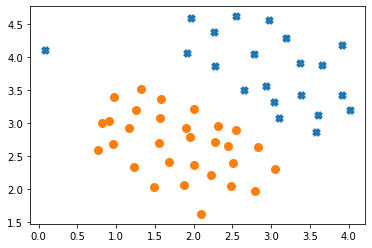

In [3]:
data = loadmat('ex6data1.mat')
X, y = data['X'], data['y'][:, 0]
plotData(X, y)

In [21]:
def svmTrain(X, Y, C, kernelFunction, tol=1e-3, max_passes=5, args=()):
    
    Y = Y.astype(int)
   
    m, n = X.shape

    passes = 0
    E = np.zeros(m)           
    alphas = np.zeros(m)      # theta
    b = 0                    # theta zero
    print(Y.shape)
    Y[Y == 0] = -1
    print(Y)
#    .......................................................................................................



    if kernelFunction.__name__ == 'linearKernel':
        K = np.dot(X, X.T)
    elif kernelFunction.__name__ == 'gaussianKernel':
        X2 = np.sum(X**2, axis=1)
        K = X2 + X2[:, None] - 2 * np.dot(X, X.T)

        if len(args) > 0:
            K /= 2*args[0]**2

        K = np.exp(-K)
    
    # we can also add polynomical kerna
#     ..........................................................................................................
    print(K.shape)
    
    
    while passes < max_passes:
        num_changed_alphas = 0
        for i in range(m):
            E[i] = b + np.sum(alphas * Y * K[:, i]) - Y[i]     # h(theta)-y

            if (Y[i]*E[i] < -tol and alphas[i] < C) or (Y[i]*E[i] > tol and alphas[i] > 0):
                # select the alpha_j randomly
                j = np.random.choice(list(range(i)) + list(range(i+1, m)), size=1)[0]

                E[j] = b + np.sum(alphas * Y * K[:, j]) - Y[j]

                alpha_i_old = alphas[i]
                alpha_j_old = alphas[j]

                if Y[i] == Y[j]:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                else:
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])

                if L == H:
                    continue

                eta = 2 * K[i, j] - K[i, i] - K[j, j]

                # objective function positive definite, there will be a minimum along the direction
                # of linear equality constrain, and eta will be greater than zero
                # we are actually computing -eta here (so we skip of eta >= 0)
                if eta >= 0:
                    continue

                alphas[j] -= Y[j] * (E[i] - E[j])/eta
                alphas[j] = max(L, min(H, alphas[j]))

                if abs(alphas[j] - alpha_j_old) < tol:
                    alphas[j] = alpha_j_old
                    continue
                alphas[i] += Y[i]*Y[j]*(alpha_j_old - alphas[j])

                b1 = b - E[i] - Y[i]*(alphas[i] - alpha_i_old) * K[i, j] \
                     - Y[j] * (alphas[j] - alpha_j_old) * K[i, j]

                b2 = b - E[j] - Y[i]*(alphas[i] - alpha_i_old) * K[i, j] \
                     - Y[j] * (alphas[j] - alpha_j_old) * K[j, j]

                if 0 < alphas[i] < C:
                    b = b1
                elif 0 < alphas[j] < C:
                    b = b2
                else:
                    b = (b1 + b2)/2

                num_changed_alphas += 1
        if num_changed_alphas == 0:
            passes += 1
        else:
            passes = 0

    idx = alphas > 0
  

    model = {'X': X[idx, :],
             'y': Y[idx],
             'kernelFunction': kernelFunction,
             'b': b,
             'args': args,
             'alphas': alphas[idx],
             'w': np.dot(alphas * Y, X)}
    return model



In [22]:
def linearKernel(x1, x2):
    return np.dot(x1, x2)


In [23]:
def visualizeBoundaryLinear(X, y, model):
    w, b = model['w'], model['b']
    xp = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    yp = -(w[0] * xp + b)/w[1]

    plotData(X, y)
    plt.plot(xp, yp, 'm')


(51,)
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1]
(51, 51)


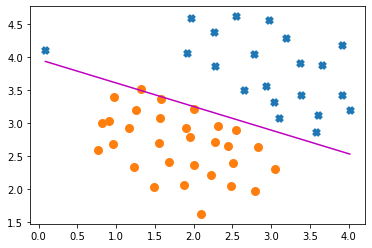

In [24]:
C = 100    #  if we reduce value of c the svm start neglecting corner point
model = svmTrain(X, y, C, linearKernel, 1e-3, 20)
# print(model)
visualizeBoundaryLinear(X, y, model)

In [ ]:
def gaussianKernel(x1, x2, sigma):
    
    sim = 0
    sim = np.exp(-np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2)))
    return sim

In [ ]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

sim = gaussianKernel(x1, x2, sigma)

In [ ]:
data = loadmat('ex6data2.mat')
X, y = data['X'], data['y'][:, 0]

plotData(X, y)

In [ ]:
def visualizeBoundary(X, y, model):
    
    plotData(X, y)

    # make classification predictions over a grid of values
    x1plot = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    x2plot = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
    X1, X2 = np.meshgrid(x1plot, x2plot)

    vals = np.zeros(X1.shape)
    for i in range(X1.shape[1]):
        this_X = np.stack((X1[:, i], X2[:, i]), axis=1)
        vals[:, i] = svmPredict(model, this_X)

    plt.contour(X1, X2, vals, colors='y', linewidths=2)
    plt.pcolormesh(X1, X2, vals, cmap='YlGnBu', alpha=0.25, edgecolors='None', lw=0)
    plt.grid(False)
    plt.show()
    

In [ ]:
def svmPredict(model, X):
    
    # check if we are getting a vector. If so, then assume we only need to do predictions
    # for a single example
    if X.ndim == 1:
        X = X[np.newaxis, :]

    m = X.shape[0]
    p = np.zeros(m)
    pred = np.zeros(m)

    if model['kernelFunction'].__name__ == 'linearKernel':
        # we can use the weights and bias directly if working with the linear kernel
        p = np.dot(X, model['w']) + model['b']
    elif model['kernelFunction'].__name__ == 'gaussianKernel':
        # vectorized RBF Kernel
        # This is equivalent to computing the kernel on every pair of examples
        X1 = np.sum(X**2, 1)
        X2 = np.sum(model['X']**2, 1)
        K = X2 + X1[:, None] - 2 * np.dot(X, model['X'].T)

        if len(model['args']) > 0:
            K /= 2*model['args'][0]**2

        K = np.exp(-K)
        p = np.dot(K, model['alphas']*model['y']) + model['b']
    else:
        # other non-linear kernel
        for i in range(m):
            predictions = 0
            for j in range(model['X'].shape[0]):
                predictions += model['alphas'][j] * model['y'][j] \
                               * model['kernelFunction'](X[i, :], model['X'][j, :])
            p[i] = predictions

    pred[p >= 0] = 1
    return pred


In [ ]:
# SVM Parameters
C = 1
sigma = 0.1

model= svmTrain(X, y, C, gaussianKernel, args=(sigma,))
visualizeBoundary(X, y, model)